<a href="https://colab.research.google.com/github/Zyuuu-G/Quantum_code/blob/main/Quantum_hw_4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

##Quantum hw 4
####Ziyu Gao
####2/14/2023

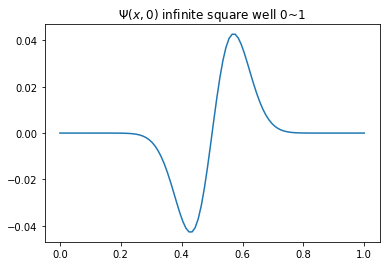

raw prob tot  0.0003133285343288751
A =  56.49370091622127
normalized total probability 0.9999999999999998


In [ ]:
# Schroeder Problem 1.30.   non-relativistic particle traped inside infinite sqaure well

# a) plot wavefunction
x = np.linspace(0,1,100)
psi = (x-0.5)*np.exp(-((x-0.5)/0.1)**2)  # set normalization const A = 1 here
plt.plot(x,psi)
plt.title('$\Psi(x,0)$ infinite square well 0~1')
plt.show()

# b) find normalization const A

psi_sq = np.real_if_close(np.conjugate(psi)*psi)
prob = np.trapz(psi_sq,x)
print('raw prob tot ',prob)

A = 1/np.sqrt(prob)
print('A = ',A)

psi_norm = A*psi
psi_sq_norm = np.real_if_close(np.conjugate(psi_norm)*psi_norm)
print('normalized total probability',np.trapz(psi_sq_norm,x))


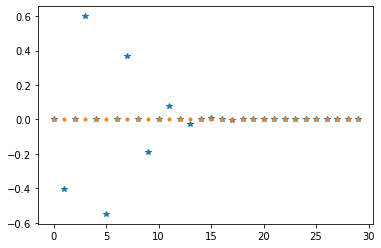

[-2.25341390e-17 -4.03066483e-01 -1.91172240e-17  5.99538725e-01
  2.22969200e-16 -5.49025811e-01 -1.37045625e-16  3.66850798e-01
  1.74256743e-16 -1.88638856e-01 -3.32321145e-16  7.64394900e-02
 -3.65733164e-18 -2.47197262e-02 -8.14381207e-17  6.42818538e-03
 -1.92950520e-17 -1.35072648e-03 -7.11259275e-17  2.30104491e-04
 -3.76683629e-16 -3.18560378e-05  5.44963595e-17  3.59027159e-06
 -1.07736357e-16 -3.29850784e-07 -3.78887227e-16  2.47233682e-08
 -1.77304200e-17 -1.51871912e-09]
[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0.]


In [ ]:
# c)

def psi_n(x,n,a):
    return np.sqrt(2/a)*np.sin(n*np.pi*x/a)

a = 1
num_modes = 30
c = np.zeros(num_modes)

for i in range(num_modes):
    integrand = np.conjugate(psi_n(x,i+1,a))*psi_norm
    c[i]=np.trapz(integrand,x)
    
plt.plot(np.real(c),'*')
plt.plot(np.imag(c),'.')
plt.show()

print(np.real(c))
print(np.imag(c))

'after a coupe tries, 16+ terms should be surfficient for vissually match the original graph'

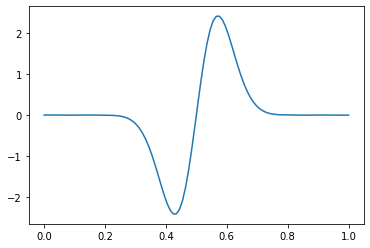

In [ ]:
# d) 

# consider do a subplot

psi_total = np.zeros(x.shape)
for i in range(16):
    psi_total+=c[i]*psi_n(x,i+1,a)
    
plt.plot(x,psi_total)

'''after a coupe tries, 16+ terms should be surfficient for vissually match the original graph'''

In [ ]:
def psi_nt(x,t,n,a):
    """ return psi_n * wiggle_n, input x, t, n, a"""
    #h = 4.136e-15  # eV*s
    #E1 = h*3e8/(0.5*a)
    #omega = E1*n**2/(h*2*np.pi)  ### use natural unit
    omega = 1*n**2
    wiggle = np.exp(-1.0j*omega*t)
    return np.sqrt(2/a)*np.sin(n*np.pi*x/a)*wiggle

In [ ]:
a=1
n=1
t=0
h = 4.136e-15  # eV*s
E1 = h*3e8/(0.5*a)
omega = E1*n**2/(h*2*np.pi)
wiggle = np.exp(-1.0j*omega*t)
print(omega)
print(wiggle)

95492965.85513721
(1+0j)


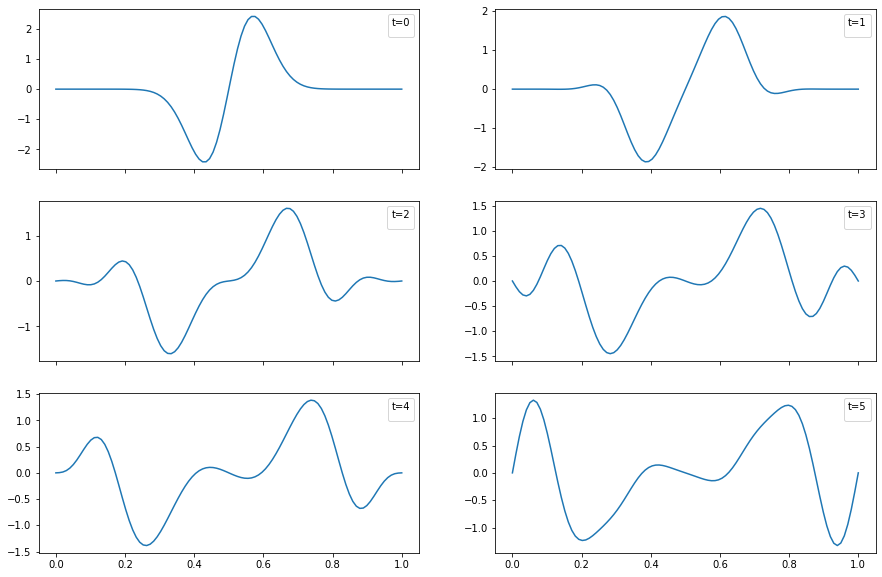

In [ ]:
# e)

psi_t0=0
for i in range(30):
    psi_t0 += c[i]*psi_nt(x,0,i+1,1)
phase0 = np.angle(psi_t0)
prob0 = np.real_if_close(np.conj(psi_t0)*psi_t0)

psi_t1=0
for i in range(30):
    psi_t1 += c[i]*psi_nt(x,.02,i+1,1)
phase1 = np.angle(psi_t1)
prob1 = np.real_if_close(np.conj(psi_t1)*psi_t1)

psi_t2=0
for i in range(30):
    psi_t2 += c[i]*psi_nt(x,.04,i+1,1)
phase2 = np.angle(psi_t2)
prob2 = np.real_if_close(np.conj(psi_t2)*psi_t2)

psi_t3=0
for i in range(30):
    psi_t3 += c[i]*psi_nt(x,.06,i+1,1)
phase3 = np.angle(psi_t3)
prob3 = np.real_if_close(np.conj(psi_t3)*psi_t3)

psi_t4=0
for i in range(30):
    psi_t4 += c[i]*psi_nt(x,.07,i+1,1)
phase4 = np.angle(psi_t4)
prob4 = np.real_if_close(np.conj(psi_t4)*psi_t4)

psi_t5=0
for i in range(30):
    psi_t5 += c[i]*psi_nt(x,.09,i+1,1)
phase5 = np.angle(psi_t5)
prob5 = np.real_if_close(np.conj(psi_t5)*psi_t5)

#psi_t6=0
#for i in range(20):
#    psi_t6 += c[i]*psi_nt(x,6,i+1,1)


cmap = plt.get_cmap('hsv')

plt.rcParams['figure.figsize']=15,10
fig, axes = plt.subplots(3,2,sharex=True)

line1, = axes[0,0].plot(x,np.real(psi_t0))
axes[0,0].legend(title='t=0')

line2, = axes[0,1].plot(x,np.real(psi_t1))
axes[0,1].legend(title='t=1')

line3, = axes[1,0].plot(x,np.real(psi_t2))
axes[1,0].legend(title='t=2')

line4, = axes[1,1].plot(x,np.real(psi_t3))
axes[1,1].legend(title='t=3')

line5, = axes[2,0].plot(x,np.real(psi_t4))
axes[2,0].legend(title='t=4')

line6, = axes[2,1].plot(x,np.real(psi_t5))
axes[2,1].legend(title='t=5')


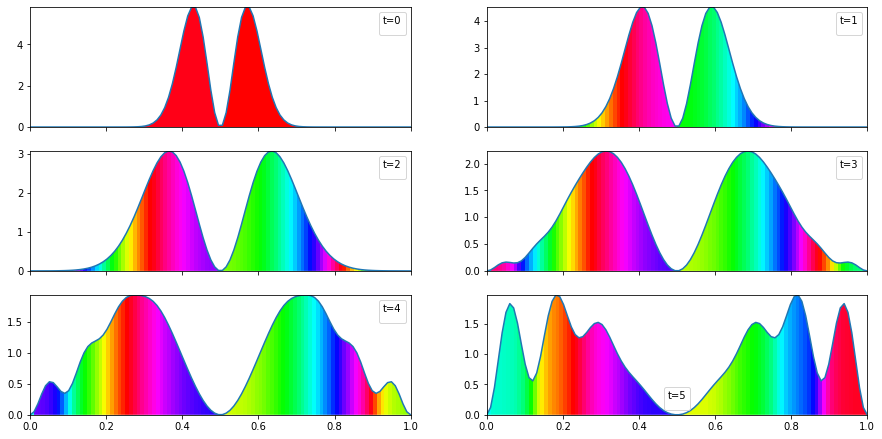

In [ ]:
from matplotlib.patches import PathPatch
from matplotlib import rc       # these lines needed to run it on Colab
rc('animation', html='jshtml')  # these lines needed to run it on Colab

cmap = plt.get_cmap('hsv')

plt.rcParams['figure.figsize']=15,7.5
fig, axes = plt.subplots(3,2,sharex=True)

p1, = axes[0,0].plot(x,prob0)
axes[0,0].legend(title='t=0')

p2, = axes[0,1].plot(x,prob1)
axes[0,1].legend(title='t=1')

p3, = axes[1,0].plot(x,prob2)
axes[1,0].legend(title='t=2')

p4, = axes[1,1].plot(x,prob3)
axes[1,1].legend(title='t=3')

p5, = axes[2,0].plot(x,prob4)
axes[2,0].legend(title='t=4')

p6, = axes[2,1].plot(x,prob5)
axes[2,1].legend(title='t=5')



poly = axes[0,0].fill_between(x,0, prob0, color='none')
img = axes[0,0].imshow(phase0.reshape(1, -1), extent=[x[0], x[-1], 0, prob0.max()], cmap=cmap, aspect='auto')
clip_poly = PathPatch(poly.get_paths()[0], transform=axes[0,0].transData)
img.set_clip_path(clip_poly)


poly = axes[0,1].fill_between(x,0, prob1, color='none')
img = axes[0,1].imshow(phase1.reshape(1, -1), extent=[x[0], x[-1], 0, prob1.max()], cmap=cmap, aspect='auto')
clip_poly = PathPatch(poly.get_paths()[0], transform=axes[0,1].transData)
img.set_clip_path(clip_poly)

poly = axes[1,0].fill_between(x,0, prob2, color='none')
img = axes[1,0].imshow(phase2.reshape(1, -1), extent=[x[0], x[-1], 0, prob2.max()], cmap=cmap, aspect='auto')
clip_poly = PathPatch(poly.get_paths()[0], transform=axes[1,0].transData)
img.set_clip_path(clip_poly)

poly = axes[1,1].fill_between(x,0, prob3, color='none')
img = axes[1,1].imshow(phase3.reshape(1, -1), extent=[x[0], x[-1], 0, prob3.max()], cmap=cmap, aspect='auto')
clip_poly = PathPatch(poly.get_paths()[0], transform=axes[1,1].transData)
img.set_clip_path(clip_poly)

poly = axes[2,0].fill_between(x,0, prob4, color='none')
img = axes[2,0].imshow(phase4.reshape(1, -1), extent=[x[0], x[-1], 0, prob4.max()], cmap=cmap, aspect='auto')
clip_poly = PathPatch(poly.get_paths()[0], transform=axes[2,0].transData)
img.set_clip_path(clip_poly)

poly = axes[2,1].fill_between(x,0, prob5, color='none')
img = axes[2,1].imshow(phase5.reshape(1, -1), extent=[x[0], x[-1], 0, prob5.max()], cmap=cmap, aspect='auto')
clip_poly = PathPatch(poly.get_paths()[0], transform=axes[2,1].transData)
img.set_clip_path(clip_poly)


In [ ]:
# problem 1.32 (but use the same wavefunction above)

# a)  # prob finding E1
psi_E1 = c[0]*psi_n(x,1,1)  # c_1st = c[0]
psi_E1_sq = np.real_if_close(np.conjugate(psi_E1)*psi_E1)
prob_E1 = np.trapz(psi_E1_sq,x)
print('The probability of finding the particle at its first energy state E1 is ',prob_E1)


# b)  # most likely outcome of energy measurement
large = 0
Elevel = 1

for i in range(len(c)):
  if large < abs(c[i]):
    large = c[i]
    E_level = i+1

print('\n\nE',E_level,'is most likely to be found, it has the largest C_n.\nC_4 = ',large)

psi_E4 = c[3]*psi_n(x,4,1)
psi_E4_sq = np.real_if_close(np.conjugate(psi_E4)*psi_E4)
prob_E4 = np.trapz(psi_E4_sq,x)

print('Probability of finding the particle at E4 is ',prob_E4)


The probability of finding the particle at its first energy state E1 is  5.077874215048937e-34


E 4 is most likely to be found, it has the largest C_n.
C_4 =  0.5995387246519178
Probability of finding the particle at E4 is  0.3594466823572482


In [ ]:
# c)
psi_tot_sq = np.real_if_close(np.conj(psi_total)*psi_total)
prob_tot30 = np.trapz(psi_tot_sq,x)
print('the total probability of the first 30 terms are ',prob_tot30)

# d) 
'''
Each psi_n has an unique wiggle factor accroding to its wavelength (energy level). 
Because they change differently, we need to calculate the individual wavefunctions at the specific time (or say aft the time evolution) and then sum up for the complete wavefuction
'''

the total probability of the first 30 terms are  0.9999999999999999
